In [1]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import *

%matplotlib inline

In [2]:
def solver(T, C, hlim, r0s, v0s, G, masses, h0 = 0.01, t0 = 0):
    '''
    Evolution of the n-body problem using an adaptive numerical scheme.
    
    input: - scheme: numerical scheme to use
           - t0:     starting time
           - T:      time period 
           - h:      initial timestep
           - r0s:    starting position of each particle 
           - v0s:    starting velocity of each particle 
           - G:      gravitational constant
           - masses: mass of each particle      
           
    output: - t_vals:  list of time values
            - rs_traj: trajectory of positions of each particle 
            - vs_traj: trajectory of velocity of each particle 
            - ke_traj: trajectory of kinetic energy of each particle 
            - pe_traj: trajectory of potential energy of each particle 
            - am_traj: trajectory of angular momentum of each particle 
    '''
    
    # reposition centre of mass to origin with no momentum 
    rcom, vcom = CentreOfMass(r0s, v0s, masses)
    r0s -= rcom
    v0s -= vcom
    
    # Make a copy of initial values
    rs = np.copy(r0s)
    vs = np.copy(v0s)
    t = t0
    h = h0
    
    # Initialize our saved trajectories to be blank 
    t_vals = [t0]
    rs_traj = [r0s] 
    vs_traj = [v0s] 
    E_traj = [TotalEnergy(r0s, v0s, G, masses)]
    am_traj = [AngMomentum(r0s, v0s, masses)]
    ke_traj = [KineticEnergy(v0s, masses)]
    pe_traj = [PotentialEnergy(r0s, G, masses)]
    times = 0 
    
    E0 = np.sum(E_traj[0])
    E0hat = E0 
    
    ## conditions to avoid dividing by zero 
    if E0hat == 0: E0hat = np.max(np.abs(E_traj[0])) 
    if E0hat == 0: E0hat = 1

    print('E0', E0)
    rs, vs = PEFRLStep(rs, vs, h, G, masses) 
    
    # run scheme for requried number of steps 
    while t <= T:
        t1 = time.time()

        h = C * findh(rs, vs) # proposed timestep

        rs_bar, vs_bar = PEFRLStep(rs, vs, h, G, masses)
        h_bar = C * findh(rs_bar, vs_bar) # proposed timestep

        h_new = (h + h_bar) / 2
        
        rs, vs = PEFRLStep(rs, vs, h_new, G, masses)

        times += time.time() - t1

        E = TotalEnergy(rs, vs, G, masses) # Calculate Energy 
        am = AngMomentum(rs, vs, masses) # Calculate angular momentum 
        ke = KineticEnergy(vs, masses)
        pe = PotentialEnergy(rs, G, masses)
        
        if h_new < hlim: 
            print('End due to stepsize')
            break
        if t+h_new > T: 
            print('Time-limit reached')
            break 
        if np.abs(np.sum(E) - E0) / np.abs(E0hat) > 0.01:
            print('Energy Error High')
            break 
        
        t += h_new

        ## append values to trajectories 
        t_vals = t_vals + [t]
        rs_traj = rs_traj + [rs] 
        vs_traj = vs_traj + [vs]
        E_traj = E_traj + [E]
        ke_traj = ke_traj + [ke]
        pe_traj = pe_traj + [pe]
        am_traj = am_traj + [am]
        
    # Make trajectories into numpy arrays
    rs_traj = np.array(rs_traj)
    vs_traj = np.array(vs_traj) 
    E_traj = np.array(E_traj)
    am_traj = np.array(am_traj)
    
    # reposition centre of mass to origin with no momentum 
    rs_traj = np.array([rs + rcom for rs in rs_traj])
    vs_traj = np.array([vs + vcom for vs in vs_traj])
    
    return (t_vals, rs_traj, vs_traj, E_traj, am_traj, times), ke_traj, pe_traj

#### FIG 8

In [3]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])
masses = np.array([m1, m2, m3])

In [4]:
T = 1000
hlim = 1e-3
C = 0.5

In [5]:
traj, ke_traj, pe_traj = solver(T, C, hlim, r0s, v0s, G, masses)

E0 -1.287144495085
Time-limit reached


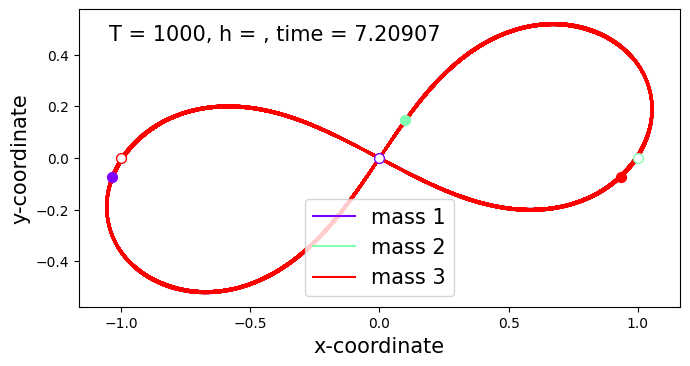

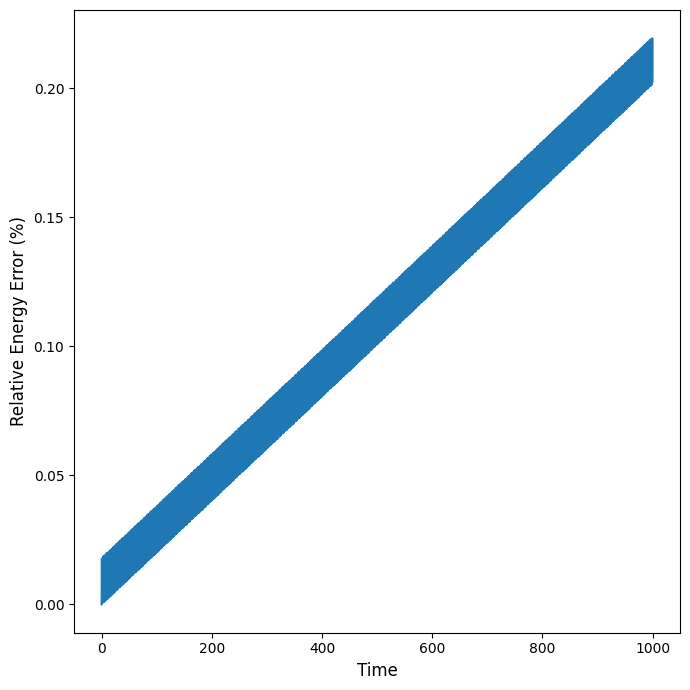

In [6]:
PlotOrbits(traj, '', T, '', masses)
PlotEnergy(traj)

#### EULER

In [22]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([2,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.5,0], dtype="float64")
v2 = np.array([0,0,0], dtype="float64")
v3 = np.array([0,-0.5,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])
masses = np.array([m1, m2, m3])

In [26]:
traj, ke_traj, pe_traj = solver(T, 0.2, hlim, r0s, v0s, G, masses)

E0 -2.25
Time-limit reached


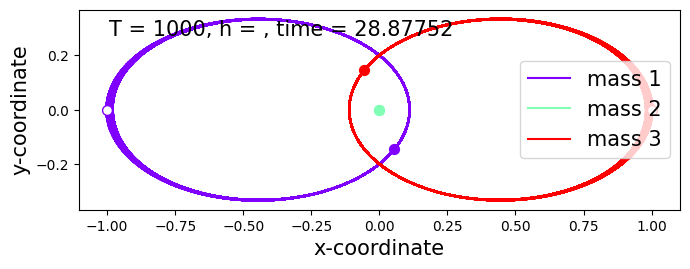

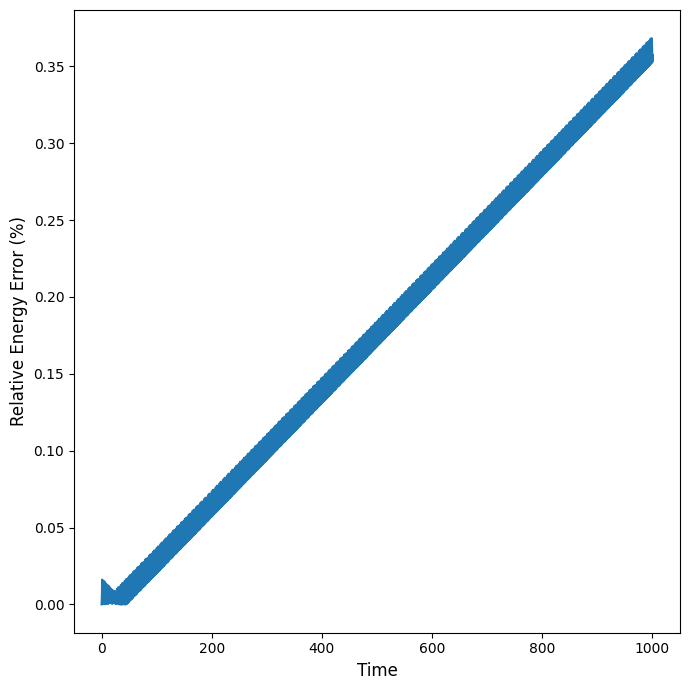

In [27]:
PlotOrbits(traj, '', T, '', masses)
PlotEnergy(traj)